# Pokemon Go Analysis

## Purpose of the Analysis:

### Find the formula for CP

My purpose of the analysis is to see which statistics correlates the most to a Pokemon's CP in the game Pokemon GO. I am a lifelong pokemon fan which often look at the statistics of the pokemon to determine which pokemon is best to build a string team. When Pokemon Go was released, they introduced a new statistics called CP, which had me question what linear combination of statistics make it up.

### Prediction of the 6th Generation Pokemon's CP

I also am interested to predict the CP of the pokemons that will be released in the near future. This will help me anticipate which pokemons will be strong upon release.

### Analysis of the Strongest Pokemon Type in Pokemon GO

Upon analyzing the CP and statistics of the pokemons, I want to see what pokemon's type is the strongest.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn import linear_model as m

#Set filepath to read in data
default_path='/Users/bench/Documents/Python Scripts/Pokemon'
os.chdir(default_path)

I will use both data from the main series game and also data from Pokemon GO. Data was retrieved from the following sources:

Pokemon GO: https://www.kaggle.com/netzuel/pokmon-go-dataset-15-generations

Main Pokemon Games: https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6

In [5]:
poke_game = pd.read_csv('pokemoncomplete.csv', index_col=0, encoding= 'unicode_escape')

poke_go = pd.read_csv('pogo.csv', index_col=0, encoding= 'unicode_escape')

## EDA

Dropping a few columns and renaming from one of the dataset due to duplicate data.

In [6]:
poke_go=poke_go.reset_index()
poke_game.drop(columns=['Type 1','Type 2','Legendary'], inplace=True)
poke_game.rename(columns={'Attack':'Attack_g','Defense':'Defense_g'}, inplace=True)

Inspecting any NaNs and addressing them if any.

In [9]:
display(poke_go.isna().sum())
poke_game.isna().sum()


Name            0
Pokedex         0
Stamina         0
Attack          0
Defense         0
Primary         0
Secondary       0
MaxHP           0
Capture_rate    0
Escape_rate     0
Weight          0
Height          0
Legendary       0
MaxCP           0
Generation      0
dtype: int64

Name          0
Total         0
HP            0
Attack_g      0
Defense_g     0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
dtype: int64

Combining the datasets to form one big table.

In [10]:
poke_go['Name']=poke_go['Name'].str.lower()
poke_game['Name']=poke_game['Name'].str.lower()

poke_go_compare=poke_go.merge(poke_game,left_on='Name',right_on='Name', how='inner')
poke_go_compare.drop(columns=['Generation_y'], inplace=True)
poke_go_compare.rename(columns={'Generation_x':'Generation'}, inplace=True)

From here, we are able to determine if there are any Pokemons that didn't make the final table after the merge. I addressed the missing pokemons by (TODO).

In [12]:
missing=poke_go.loc[poke_go['Pokedex'].isin(poke_go_compare['Pokedex'])==False,'Name']
## Code


Make the final combined table that includes the missing Pokemons from the initial merge.

In [13]:
poke_go_complete=poke_go.merge(poke_game,left_on='Name',right_on='Name', how='inner')
poke_go_complete.drop(columns=['Generation_y'], inplace=True)
poke_go_complete.rename(columns={'Generation_x':'Generation'}, inplace=True)

### Visualizations

We will start by seeing the correlation of the statistics from both Pokemon GO and the main Pokemon game.

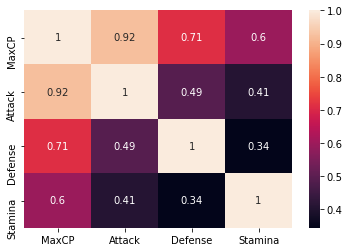

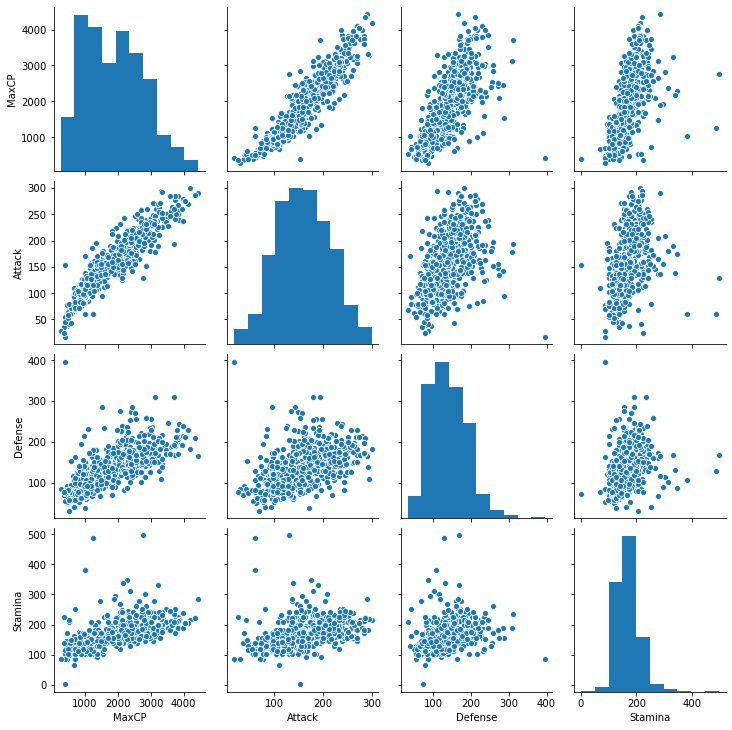

In [54]:
colInterestgame=['MaxCP','HP','Attack_g','Defense_g','Sp. Atk','Sp. Def','Speed']
colInterestgo=['MaxCP','Attack','Defense','Stamina']

sns.heatmap(poke_go_complete[colInterestgo].corr(),annot=True)

sns.pairplot(poke_go_complete.loc[:,colInterestgo])

We can see from the Pokemon Go statistics that the Max CP is highly correlated to the Attack, followed by the Defense.

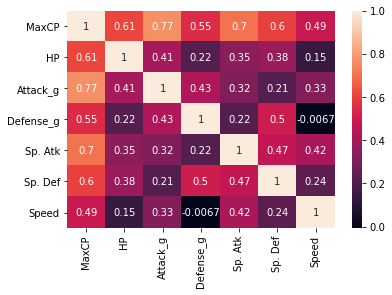

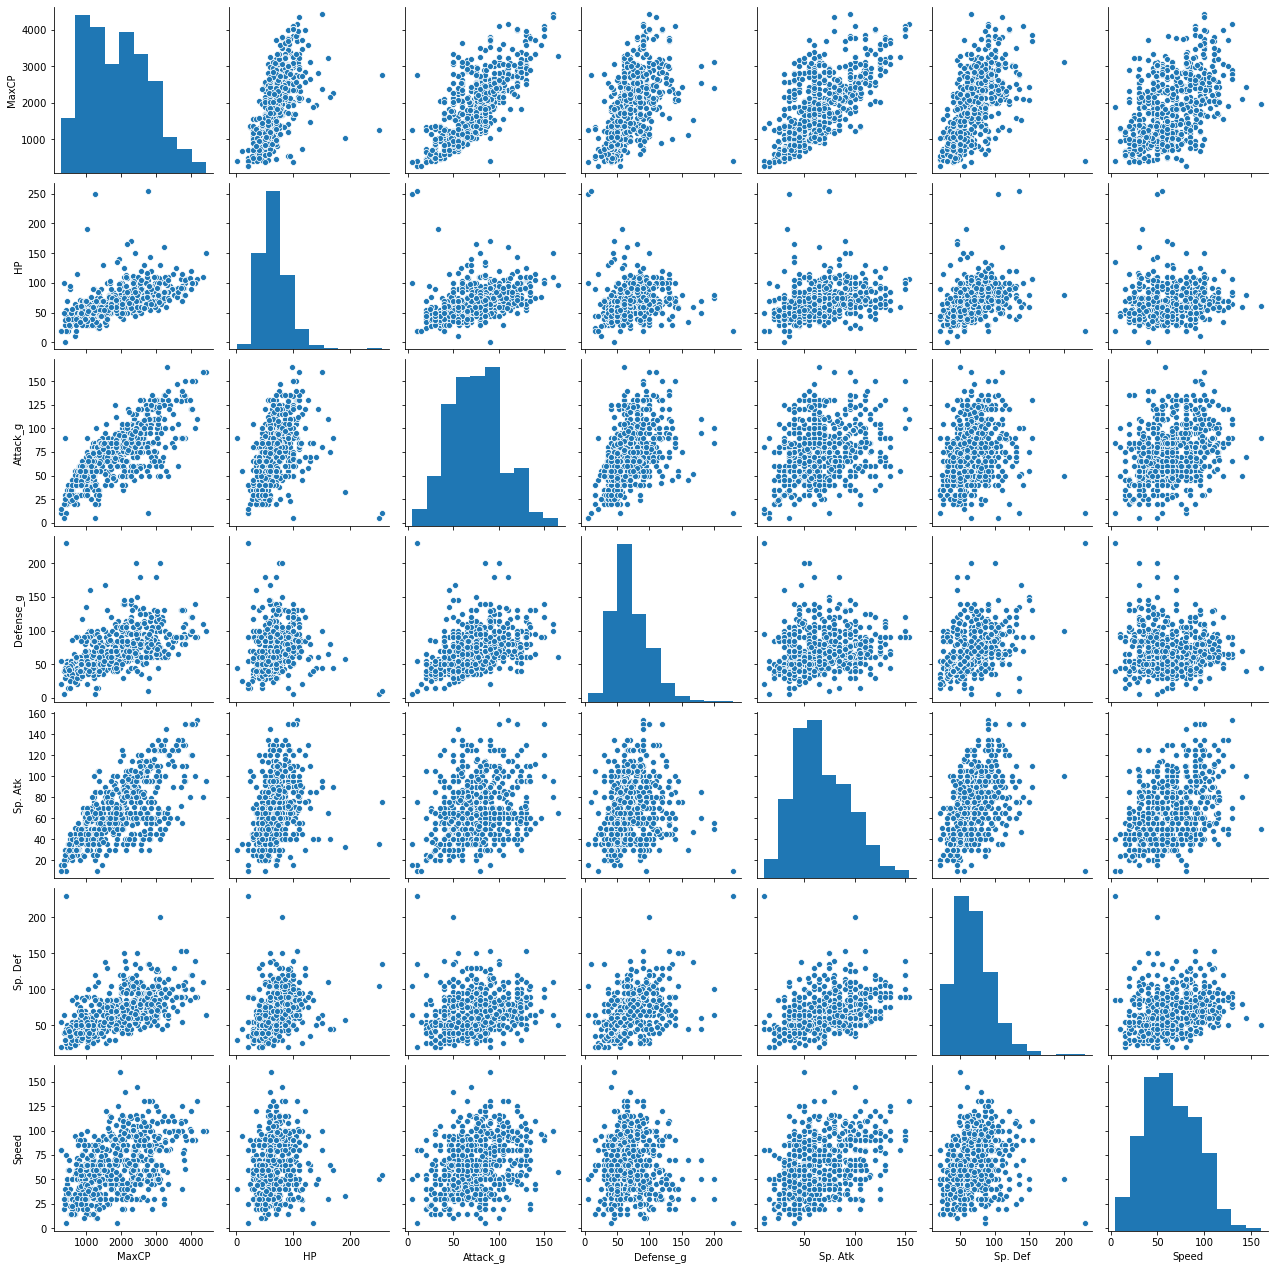

In [19]:
sns.heatmap(poke_go_complete[colInterestgame].corr(),annot=True)

sns.pairplot(poke_go_complete.loc[:,colInterestgame])

The same seemed to find for the main Pokemon game statistics, where the Attack and Special Attack statistics is correlated to the formulation of the CP statistics.

Text(0.5, 1.0, 'Distribution of Max CP')

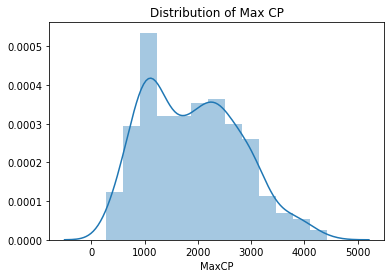

In [20]:
sns.distplot(poke_go_complete.MaxCP).set_title('Distribution of Max CP')

From the histogram, we can see that the median is around 2000 CP, with the graph being skewed to the right. This is probably because of the vast amount of 1st evolution Pokemons and also Pokemons that do not evolve.

[Text(0, 0, 'Poison'),
 Text(1, 0, 'None'),
 Text(2, 0, 'Flying'),
 Text(3, 0, 'Ground'),
 Text(4, 0, 'Fairy'),
 Text(5, 0, 'Grass'),
 Text(6, 0, 'Fighting'),
 Text(7, 0, 'Psychic'),
 Text(8, 0, 'Steel'),
 Text(9, 0, 'Ice'),
 Text(10, 0, 'Rock'),
 Text(11, 0, 'Water'),
 Text(12, 0, 'Electric'),
 Text(13, 0, 'Fire'),
 Text(14, 0, 'Dragon'),
 Text(15, 0, 'Dark'),
 Text(16, 0, 'Ghost'),
 Text(17, 0, 'Bug')]

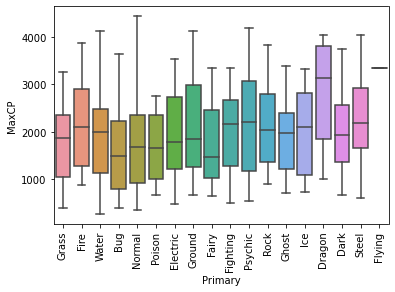

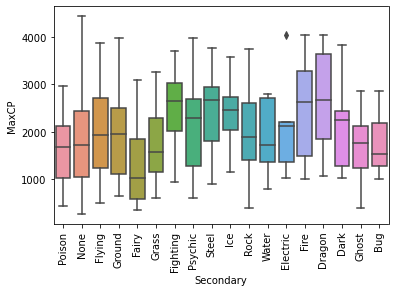

In [23]:
ax=sns.boxplot(x='Primary',y='MaxCP',data=poke_go)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.figure()
ax2=sns.boxplot(x='Secondary',y='MaxCP',data=poke_go)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)


From the boxplots, we can see that the average CP for dragon types is much higher than any other types. Fairy types have the lowest mean.

[Text(0, 0, 'Water'),
 Text(1, 0, 'Normal'),
 Text(2, 0, 'Grass'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Psychic'),
 Text(5, 0, 'Fire'),
 Text(6, 0, 'Rock'),
 Text(7, 0, 'Electric'),
 Text(8, 0, 'Ground'),
 Text(9, 0, 'Poison'),
 Text(10, 0, 'Dark'),
 Text(11, 0, 'Fighting'),
 Text(12, 0, 'Ice'),
 Text(13, 0, 'Dragon'),
 Text(14, 0, 'Steel'),
 Text(15, 0, 'Ghost'),
 Text(16, 0, 'Fairy')]

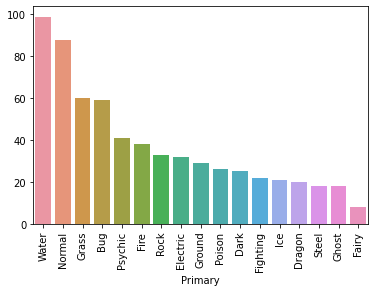

In [25]:
primarycount=poke_go_complete.groupby('Primary').size().sort_values(ascending=False)
ax3=sns.barplot(x=primarycount.index,y=primarycount)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

The bar chart shows that frequency of Pokemon primary types. Water and normal type pokemons are the most common.

[Text(0, 0, 'None'),
 Text(1, 0, 'Flying'),
 Text(2, 0, 'Poison'),
 Text(3, 0, 'Ground'),
 Text(4, 0, 'Psychic'),
 Text(5, 0, 'Steel'),
 Text(6, 0, 'Fighting'),
 Text(7, 0, 'Rock'),
 Text(8, 0, 'Dark'),
 Text(9, 0, 'Grass'),
 Text(10, 0, 'Fairy'),
 Text(11, 0, 'Water'),
 Text(12, 0, 'Fire'),
 Text(13, 0, 'Dragon'),
 Text(14, 0, 'Ghost'),
 Text(15, 0, 'Ice'),
 Text(16, 0, 'Electric'),
 Text(17, 0, 'Bug')]

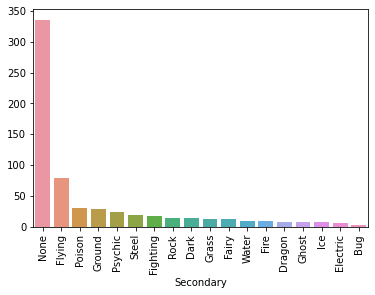

In [28]:
primarycount=poke_go_complete.groupby('Secondary').size().sort_values(ascending=False)
ax3=sns.barplot(x=primarycount.index,y=primarycount)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)

The majority of pokemons only have one type.

## Performing Linear Regression on the Data

From the pairplot, since each statistics seem to be linearly correlated to the CP, I chose to use linear regression. I chose my loss function to be the RMSE (root means squared error).

In [29]:
def rmse(y_pred,y_actual):
    return np.sqrt(np.mean((y_pred-y_actual)**2))

model=m.LinearRegression()
model.fit(poke_go_complete.loc[:,'HP':'Speed'],poke_go_complete['MaxCP'])
poke_go_complete['predCP']=model.predict(poke_go_complete.loc[:,'HP':'Speed'])

The RMSE is 217.89633796670225


array([ 7.1661779 , 12.91500413,  5.40630065,  9.99226395,  5.249982  ,
        5.01208434])

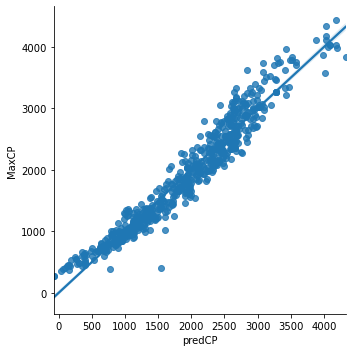

In [31]:
sns.lmplot(data=poke_go_complete,x='predCP',y='MaxCP')

error=rmse(poke_go_complete['predCP'],poke_go_complete['MaxCP'])
print(f'The RMSE is {error}')

model.coef_

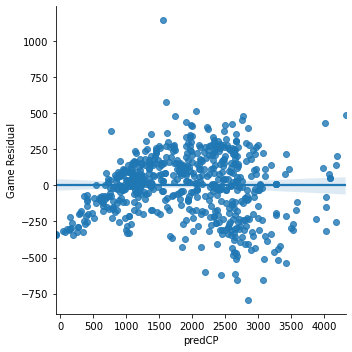

In [60]:
residual=poke_go_complete.loc[:,['MaxCP','predCP']].diff(axis=1)
residual.drop(columns='MaxCP',inplace=True)
poke_go_complete['Game Residual']=residual.rename(columns={'predCP':'Residual'})
residual

sns.lmplot(data=poke_go_complete,x='predCP',y='Game Residual')

The residual plot shows that the residuals are spread apart throughout the whole x-axis, indicating that the fit seems to be fine.

We will do the same analysis for the Pokemon GO data.

The RMSE is 135.0569980040451


array([11.07443328,  5.36155466,  4.14651724])

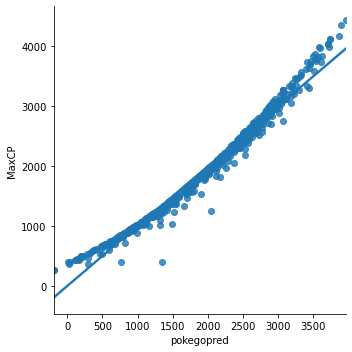

In [59]:
model2=m.LinearRegression()
model2.fit(poke_go_complete.loc[:,['Attack','Defense','Stamina']],poke_go_complete['MaxCP'])
poke_go_complete['pokegopred']=model2.predict(poke_go_complete.loc[:,['Attack','Defense','Stamina']])

sns.lmplot(x='pokegopred',y='MaxCP',data=poke_go_complete)

error2=rmse(poke_go_complete['pokegopred'],poke_go_complete['MaxCP'])
print(f'The RMSE is {error2}')

model2.coef_

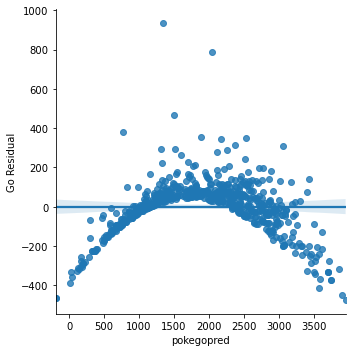

In [58]:
residual=poke_go_complete.loc[:,['MaxCP','pokegopred']].diff(axis=1)
residual.drop(columns='MaxCP',inplace=True)
poke_go_complete['Go Residual']=residual.rename(columns={'pokegopred':'Residual'})
residual

sns.lmplot(data=poke_go_complete,x='pokegopred',y='Go Residual')

Unlike the residual plot from the Pokemon series data, this residual plot seems to have a quadratic trend. This indicates that we need to make the multiple linear regression more complex.

The RMSE is 135.0569980040451


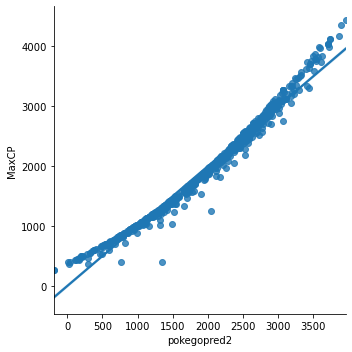

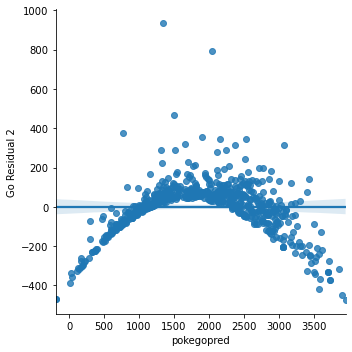

In [62]:
## Do one hot encoding on type

model3=m.LinearRegression()
model3.fit(poke_go_complete.loc[:,['Attack','Defense','Stamina']],poke_go_complete['MaxCP'])
poke_go_complete['pokegopred2']=model3.predict(poke_go_complete.loc[:,['Attack','Defense','Stamina']])

sns.lmplot(x='pokegopred2',y='MaxCP',data=poke_go_complete)

error3=rmse(poke_go_complete['pokegopred2'],poke_go_complete['MaxCP'])
print(f'The RMSE is {error3}')

model3.coef_

residual=poke_go_complete.loc[:,['MaxCP','pokegopred2']].diff(axis=1)
residual.drop(columns='MaxCP',inplace=True)
poke_go_complete['Go Residual 2']=residual.rename(columns={'pokegopred2':'Residual'})
residual

sns.lmplot(data=poke_go_complete,x='pokegopred',y='Go Residual 2')

From both of the game data, this confirms my suspcision in the EDA that the Attack had the highest influence on the CP in the Pokemon GO data, and the same goes for the Attack and Special Attack in the main Pokemon series data. 

For fun, I wanted to see which pokemons are causing the largest residuals. 

In [50]:
# Determine Pokemon with Biggest Error

biggestDiff=poke_go_complete.loc[:,['MaxCP','predCP']].diff(axis=1).sort_values('predCP',ascending=False).head(20).index

poke_go_complete.loc[biggestDiff,'Name']

211      shuckle
200    wobbuffet
408    bastiodon
382     rayquaza
319      wailord
112      chansey
330     cacturne
318      wailmer
635       kyurem
317     sharpedo
437    spiritomb
196      murkrow
354     dusclops
410       mothim
377    registeel
503      liepard
290     shedinja
334      seviper
329       cacnea
316     carvanha
Name: Name, dtype: object

From domain knowledge, it seems like pokemons with a large defense or special defense value is throwing off the regression.

## Predicting the CP for the 6th Generation Pokemons in Pokemon GO

In [40]:
gen6poke=poke_game.loc[poke_game['Generation']==6,:]

gen6poke['CP']=model.predict(gen6poke.loc[:,'HP':'Speed'])

gen6poke.sort_values('CP',ascending=False).loc[:,['Name','CP']].head(10)

C:\Users\bench\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,CP
#,,
719,dianciemega diancie,4448.758354
720,hoopahoopa unbound,4447.988408
716,xerneas,4129.849879
717,yveltal,4129.849879
720,hoopahoopa confined,3552.272079
721,volcanion,3466.805559
681,aegislashblade forme,3401.366276
706,goodra,3304.276749
718,zygarde50% forme,3205.645885


## Determining the Strongest Pokemon Type in Pokemon GO

In [41]:
def normalization(data):
    return (data-np.mean(data))/np.std(data)
poke_go_complete_scaled = pd.DataFrame(normalization(poke_go_complete.loc[:,['Attack','Defense','Stamina']]))

poke_go_complete_scaled['OverallStrength']=np.sum(poke_go_complete_scaled,axis=1)
poke_go_complete_scaled['Name']=poke_go_complete['Name']
poke_go_complete_scaled['Primary']=poke_go_complete['Primary']
poke_go_complete_scaled['Secondary']=poke_go_complete['Secondary']